## Task 1: Iris Flower Classification

#### By: Pankaj Kanyal

### About DataSet

- Iris Flower Dataset 
[Here](http://archive.ics.uci.edu/ml/datasets/Iris)


### Data Description:

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for the setosa class)
   4. Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE 
      Transactions on Information Theory, May 1972, 431-433.
      -- Results:
         -- very low misclassification rates again
   5. See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al's AUTOCLASS II
      conceptual clustering system finds 3 classes in the data.

4. Relevant Information:
   --- This is perhaps the best known database to be found in the pattern
       recognition literature.  Fisher's paper is a classic in the field
       and is referenced frequently to this day.  (See Duda & Hart, for
       example.)  The data set contains 3 classes of 50 instances each,
       where each class refers to a type of iris plant.  One class is
       linearly separable from the other 2; the latter are NOT linearly
       separable from each other.
   --- Predicted attribute: class of iris plant.
   --- This is an exceedingly simple domain.
   --- This data differs from the data presented in Fishers article
	(identified by Steve Chadwick,  spchadwick@espeedaz.net )
	The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa"
	where the error is in the fourth feature.
	The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa"
	where the errors are in the second and third features.  

5. Number of Instances: 150 (50 in each of three classes)

6. Number of Attributes: 4 numeric, predictive attributes and the class

7. Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

8. Missing Attribute Values: None

Summary Statistics:
	         Min  Max   Mean    SD   Class Correlation
   sepal length: 4.3  7.9   5.84  0.83    0.7826   
    sepal width: 2.0  4.4   3.05  0.43   -0.4194
   petal length: 1.0  6.9   3.76  1.76    0.9490  (high!)
    petal width: 0.1  2.5   1.20  0.76    0.9565  (high!)

9. Class Distribution: 33.3% for each of 3 classes.

### Project Index

- [1 - Packages](#1)
    - [1.1 - Importing Dataset](#1-1)
- [2 - Checking Null Values and Data - type of variables](#2)
- [3 - Data Visualization](#3)
    - [3.1 - Plotting Density Plot](#3-1)
    - [3.2 - Plotting bar chart among various variable group by class](#3-2)
    - [3.3 - Plotting ScatterPlot](#3-3)
- [4 - Data Preprocessing ](#4)
- [5 - Linear Regression](#5)
    - [6.1 Evaluating Linear Regression](#5-1)
    - [6.2  Calculating Accuracy of Linear Regressoin](#5-2)
- [6 - Logistic Regression](#6)
- [7 - Conclusion](#7)

<a name='1'></a>
## 1. Packages

In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Machine Learning Libraries


In [2]:
#  According to the information given above we define the column names
col = ['sepal_length','sepal_width','petal_length', 'petal_width','class']

<a name='1-1'></a>
### 1.1 Importing dataset and giving column names

In [3]:
df = pd.read_csv('iris.data',names=col,header=None)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<a name="2"></a>
## 2. Checking Null Values and Data - type of variables

In [5]:
df.shape
# The data contain 150 rows and 6 columns

(150, 5)

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [7]:
df['class'].nunique()

3

In [8]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

Above we can see that we have 3 different class Iris-setosa, Iris-versicolor and Iris-virginica having equal number of classes of each type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<a name='3'></a>
## 3. Data Visualization

<a name='3-1'></a>
### 3.1 - Plotting Density Plot 

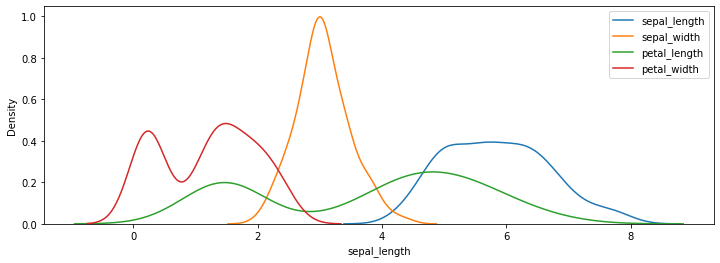

In [11]:
plt.rcParams["figure.figsize"] = (12,4)
def plotdensity():
    
    """ SHOWS THE DISTRIBUTION OF VARIABLES PRESENT IN IRIS DATASET"""
    
    sns.kdeplot(df['sepal_length'])
    sns.kdeplot(df['sepal_width'])
    sns.kdeplot(df['petal_length'])
    sns.kdeplot(df['petal_width'])
    plt.legend(col[:-1])
    plt.show()
    
plotdensity()

<a name='4-1'></a>
### 3.2 - Plotting bar chart among various variable group by class

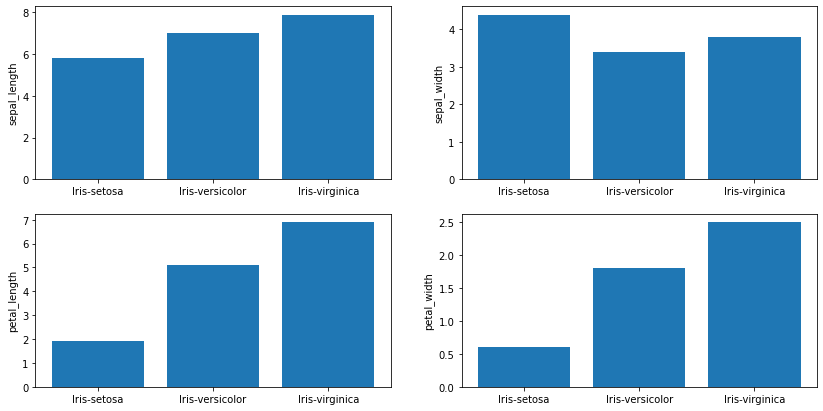

In [12]:
plt.rcParams["figure.figsize"] = (14,7)
def plotbarchart():
    """ SHOW BAR CHART GROUP BY SPECIES """
    plt.subplot(2,2,1)
    plt.bar(df['class'],df['sepal_length'])
    plt.ylabel('sepal_length')
    
    plt.subplot(2,2,2)
    plt.bar(df['class'],df['sepal_width'])
    plt.ylabel('sepal_width')
    
    plt.subplot(2,2,3)
    plt.bar(df['class'],df['petal_length'])
    plt.ylabel('petal_length')
    
    plt.subplot(2,2,4)
    plt.bar(df['class'],df['petal_width'])
    plt.ylabel('petal_width')
    
    plt.show()
    
    
plotbarchart()


<a name='3-3'></a>
### 3.3 - Plotting ScatterPlot

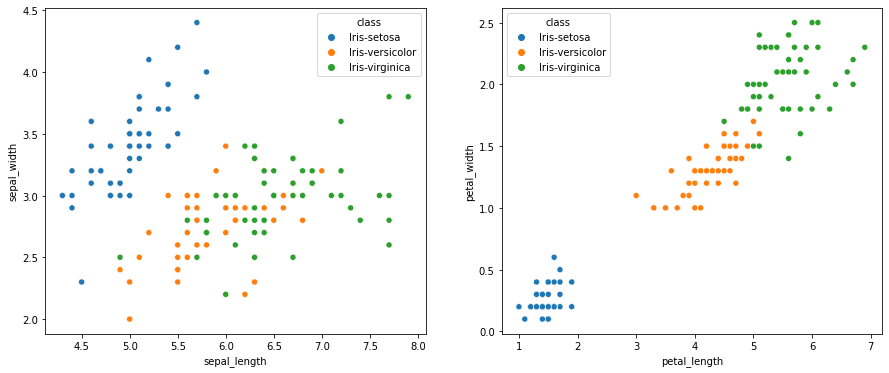

In [13]:
plt.rcParams["figure.figsize"] = (15,6)
def scatterplot():
    """ Plot Scatter Plot between sepal_length vs sepal_width, petal_lenght vs petal_width"""
    plt.subplot(1,2,1)    
    sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='class')
    plt.subplot(1,2,2)
    sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='class')
    
    
scatterplot()

<a name='4'></a>
## 4. Data Preprocessing

In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

encoder = preprocessing.LabelEncoder()
encoder.fit(df['class'])
df['class'] = encoder.transform(df['class'])

In [15]:
df['class'].unique()  #the categorical variable got encoded 

array([0, 1, 2])

In [16]:
x = df.iloc[:,:-1].values #independent features
y = np.array(df['class']) #dependent features

In [17]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
np.array(df['class'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

print('Train X {}'.format(x_train.shape))
print('Test x {}'.format(x_test.shape))
print('Train y {}'.format(y_train.shape))
print('Test y {}'.format(y_test.shape))

Train X (105, 4)
Test x (45, 4)
Train y (105,)
Test y (45,)


<a name='5'></a>
## 5. Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

<a name='5-1'></a>
### 5.1 - Evaluating Linear Regression

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.19555466163203253
Mean Squared Error: 0.05832633761832455
Mean Root Squared Error: 0.2415084628296171


<a name='5-2'></a>
### 5.2 - Calculating Accuracy of Linear Regressoin

In [22]:
print('Accuracy of Linear Regression : {}%'.format(round(lr.score(x_test,y_test)*100,4)))

Accuracy of Linear Regression : 91.225%


<a name='6'></a>
## 6. Logistic Regression

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#normalizing the dataset to make training effective
scaler = StandardScaler()
scaler.fit(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

logr = LogisticRegression(max_iter=1000)
logr.fit(x_train,y_train)

y_pred = logr.predict(x_test)


<a name='6-1'></a>
### 6.1 - Evaluating Logistic Regression

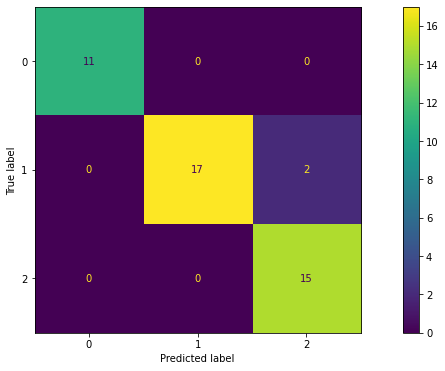

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

- 0 -> Iris-setosa
- 1 -> Iris-versicolor
- 2 -> Iris-verginica

In [25]:
print('Accuracy of Linear Regression : {}%'.format(round(logr.score(x_test,y_test)*100,4)))

Accuracy of Linear Regression : 95.5556%


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94        19
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



<a name='7'></a>
## 7. Conclusion

- **Logistic regression** give 93.333% accuracy on test data.
- **Linear Regression** give 93.813 nearly equals to 94% accuracy on test data.